In [1]:
import pandas as pd

In [10]:
f = r'c:\Users\mirandaa\Desktop\Kai_res_compare\calcres_0.pkl'

In [12]:
df = pd.read_pickle(f)

In [15]:
%notebook inline
df


,0,1,2,3,4,5
0,0,0,31,1198.094360,0.005990,0.006836
1,0,0,31,1195.823730,0.005979,0.005981
2,0,0,31,1079.979004,0.005400,0.005127
3,0,0,31,924.803101,0.004624,0.004272
4,0,0,31,903.821777,0.004519,0.003418
5,0,0,31,901.806030,0.004509,0.002991
6,0,0,31,681.484497,0.003407,0.002563
7,0,0,31,607.959839,0.003040,0.002136
8,0,0,31,502.293854,0.002511,0.001923
9,0,0,31,497.344055,0.002487,0.001709


In [16]:
df.columns = ['key', 'item', 'scancount', 'mass', 'old_res', 'calc_tol']


In [17]:
df

,key,item,scancount,mass,old_res,calc_tol
0,0,0,31,1198.094360,0.005990,0.006836
1,0,0,31,1195.823730,0.005979,0.005981
2,0,0,31,1079.979004,0.005400,0.005127
3,0,0,31,924.803101,0.004624,0.004272
4,0,0,31,903.821777,0.004519,0.003418
5,0,0,31,901.806030,0.004509,0.002991
6,0,0,31,681.484497,0.003407,0.002563
7,0,0,31,607.959839,0.003040,0.002136
8,0,0,31,502.293854,0.002511,0.001923
9,0,0,31,497.344055,0.002487,0.001709


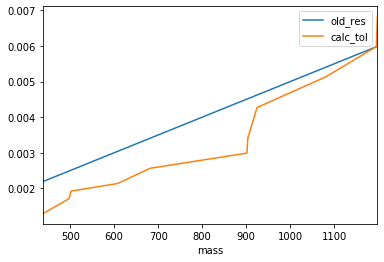

In [21]:
df.drop(['key','item','scancount'], axis = 1).plot(x='mass', y=['old_res', 'calc_tol'])

In [22]:
peaks = pd.read_pickle(r'c:\Users\mirandaa\Desktop\Kai_res_compare\190321_Serum_Lipidextract_368723_01_Peaks.pkl')
scans = pd.read_pickle(r'c:\Users\mirandaa\Desktop\Kai_res_compare\190321_Serum_Lipidextract_368723_01_Scans.pkl')

In [79]:
mask = scans.filterLine.str.contains(' ms ')
mask = mask & scans.retTime.between(33,1080)
sel_peaks = peaks.loc[scans[mask].scanNum]

In [80]:
sel_peaks

,mass,intensity,resolution,baseline,noise,charge
scanNum,,,,,,
30,350.326904,4.477022e+04,167900.0,-196.663528,26133.955078,0.0
30,350.365692,3.144074e+04,143000.0,-196.279694,26135.089844,0.0
30,350.876953,3.791240e+05,222902.0,-191.220413,26150.044922,0.0
30,350.987732,1.263220e+05,211000.0,-190.124176,26153.285156,0.0
30,351.001923,5.862592e+05,223002.0,-189.983749,26153.701172,0.0
...,...,...,...,...,...,...
3060,1196.826172,3.996709e+05,116502.0,453.957397,17484.375000,1.0
3060,1197.090332,1.221507e+06,122207.0,453.807373,17483.542969,1.0
3060,1197.829590,8.415909e+04,99100.0,453.387634,17481.218750,0.0


In [83]:
sel_peaks_sets = []
for i in df.itertuples():
    idf = sel_peaks.loc[sel_peaks.mass.between(i.mass - i.calc_tol, i.mass + i.calc_tol)]
    idf['calc_res_idx'] = i.Index
    sel_peaks_sets.append(idf)
sel_peaks_set = pd.concat(sel_peaks_sets)

In [105]:
full_df = sel_peaks_set.merge(df, left_on='calc_res_idx', right_index=True)

In [106]:
full_df

,mass_x,intensity,resolution,baseline,noise,charge,calc_res_idx,key,item,scancount,mass_y,old_res,calc_tol
scanNum,,,,,,,,,,,,,
30,1198.093628,8.726337e+05,119202.0,425.374023,32878.558594,1.0,0,0,0,31,1198.094360,0.005990,0.006836
131,1198.093384,1.087146e+06,119202.0,434.243378,22225.521484,1.0,0,0,0,31,1198.094360,0.005990,0.006836
232,1198.093750,8.418350e+05,120202.0,393.667419,19700.337891,0.0,0,0,0,31,1198.094360,0.005990,0.006836
333,1198.093872,1.048154e+06,121202.0,404.978638,19226.619141,1.0,0,0,0,31,1198.094360,0.005990,0.006836
434,1198.094360,8.006381e+05,117802.0,407.737183,19325.818359,0.0,0,0,0,31,1198.094360,0.005990,0.006836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,437.346161,1.199603e+06,201802.0,-17.765316,17488.250000,1.0,10,0,0,31,437.346283,0.002187,0.001282
2757,437.346252,1.305334e+06,203502.0,-1.674874,14428.203125,1.0,10,0,0,31,437.346283,0.002187,0.001282
2858,437.346222,1.058370e+06,202102.0,-0.801765,17996.425781,1.0,10,0,0,31,437.346283,0.002187,0.001282


In [100]:
summary_lines = []
for group , group_df in full_df.groupby('calc_res_idx'):
    min_max = group_df.mass_x.max() - group_df.mass_x.min()
    res_avg = group_df.resolution.mean()
    line = (group_df.mass_x.mean(),res_avg,min_max,group_df.iloc[0].mass_y,group_df.iloc[0].old_res,group_df.iloc[0].calc_tol)
    summary_lines.append(line)


In [107]:
summary_df = pd.DataFrame(summary_lines, columns='avg_mass avg_res minmax_mass tol_mass lx1res calctol'.split())

In [130]:
summary_df['invert_res'] = 1000 / summary_df.avg_res  #1000 to put it in scale

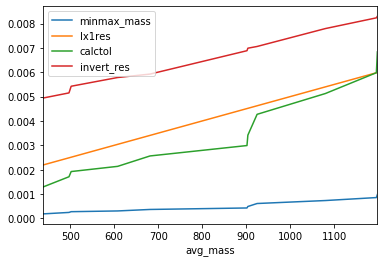

In [131]:
summary_df.plot(x= 'avg_mass', y=['minmax_mass', 'lx1res', 'calctol', 'invert_res'])

In [132]:
summary_df

,avg_mass,avg_res,minmax_mass,tol_mass,lx1res,calctol,invert_res
0,1198.093825,120479.419355,0.000977,1198.094360,0.005990,0.006836,0.008300
1,1195.823392,121440.709677,0.000854,1195.823730,0.005979,0.005981,0.008234
2,1079.978531,128298.774194,0.000732,1079.979004,0.005400,0.005127,0.007794
3,924.802860,141664.096774,0.000610,924.803101,0.004624,0.004272,0.007059
4,903.821525,143095.548387,0.000488,903.821777,0.004519,0.003418,0.006988
5,901.805826,145234.258065,0.000427,901.806030,0.004509,0.002991,0.006885
6,681.484294,168785.870968,0.000366,681.484497,0.003407,0.002563,0.005925
7,607.959652,172876.193548,0.000305,607.959839,0.003040,0.002136,0.005784
8,502.293701,184309.774194,0.000275,502.293854,0.002511,0.001923,0.005426
9,497.343925,194082.645161,0.000244,497.344055,0.002487,0.001709,0.005152


In [135]:
summary_df.to_clipboard()